In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # graphing

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
!pip install yfinance

In [3]:
import yfinance as yf

In [4]:
df = yf.download("GOOG", period="5y", interval="1d")
df

[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2020-03-25,54.864635,57.174196,54.044519,56.057985,81630000
2020-03-26,57.813667,58.222729,54.418744,55.327940,71434000
2020-03-27,55.273701,57.262283,55.034834,56.018176,64170000
2020-03-30,57.070686,57.310054,54.565554,55.986819,51482000
2020-03-31,57.866421,58.488474,56.638738,57.094579,49728000
...,...,...,...,...,...
2025-03-18,162.669998,166.440002,158.800003,165.960007,24616800
2025-03-19,166.279999,168.132996,163.050003,163.914993,24955700


In [5]:
df = df.asfreq('D')
df

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2020-03-25,54.864635,57.174196,54.044519,56.057985,81630000.0
2020-03-26,57.813667,58.222729,54.418744,55.327940,71434000.0
2020-03-27,55.273701,57.262283,55.034834,56.018176,64170000.0
2020-03-28,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2025-03-20,165.050003,167.029999,163.139999,163.824997,19981500.0
2025-03-21,166.250000,166.470001,163.029999,163.380005,29882100.0


In [6]:
df = df.fillna(method='ffill')
df

<ipython-input-6-0db3e03836a4>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2020-03-25,54.864635,57.174196,54.044519,56.057985,81630000.0
2020-03-26,57.813667,58.222729,54.418744,55.327940,71434000.0
2020-03-27,55.273701,57.262283,55.034834,56.018176,64170000.0
2020-03-28,55.273701,57.262283,55.034834,56.018176,64170000.0
2020-03-29,55.273701,57.262283,55.034834,56.018176,64170000.0
...,...,...,...,...,...
2025-03-20,165.050003,167.029999,163.139999,163.824997,19981500.0
2025-03-21,166.250000,166.470001,163.029999,163.380005,29882100.0


In [7]:
ts = df[['Close']]
ts

Price,Close
Ticker,GOOG
Date,
2020-03-25,54.864635
2020-03-26,57.813667
2020-03-27,55.273701
2020-03-28,55.273701
2020-03-29,55.273701
...,...
2025-03-20,165.050003
2025-03-21,166.250000


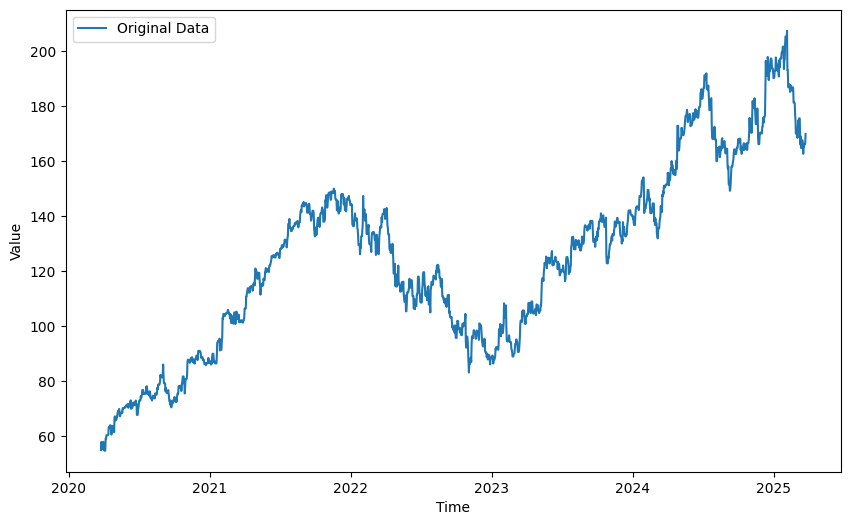

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(ts.index, ts.values, label='Original Data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts, model='additive')

In [10]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid

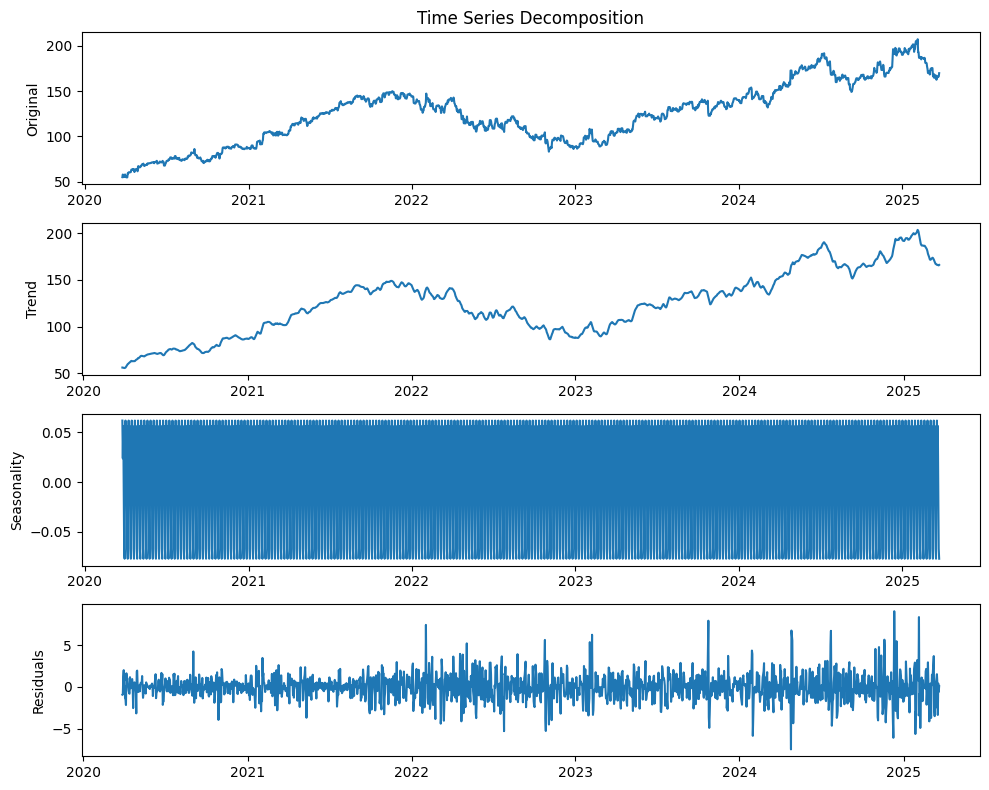

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))

# Plot the original time series
axes[0].plot(ts, label='Original')
axes[0].set_ylabel('Original')

# Plot the trend component
axes[1].plot(trend, label='Trend')
axes[1].set_ylabel('Trend')

# Plot the seasonal component
axes[2].plot(seasonal, label='Seasonality')
axes[2].set_ylabel('Seasonality')

# Plot the residuals component
axes[3].plot(residuals, label='Residuals')
axes[3].set_ylabel('Residuals')

# Add titles and legends
axes[0].set_title('Time Series Decomposition')
plt.tight_layout()
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller (ADF) Test
result = adfuller(ts)

# Extract p-value from the result
p_value = result[1]

print(p_value)

0.3999682602673908


In [13]:
!pip install pmdarima

In [14]:
#from pmdarima.arima.utils import ndiffs
# Step 1: Uninstall conflicting packages
!pip uninstall -y numpy pmdarima numba

# Step 2: Install compatible versions
!pip install numpy==1.26.4 numba==0.60.0 pmdarima

# Step 3: Restart the runtime (Manually do this before running the next step)

# Step 4: Verify the import
try:
    from pmdarima.arima.utils import ndiffs
    print("ndiffs imported successfully!")
except Exception as e:
    print(f"Error importing ndiffs: {e}")


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 48.5 MB/s eta 0:00:00
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)
ndiffs imported successfully!


In [15]:
ndiffs(ts, test="adf")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

1

In [16]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller (ADF) Test
result = adfuller(ts.Close.diff().dropna())

# Extract p-value from the result
p_value = result[1]

print(p_value)

2.9386642773424812e-21


In [17]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

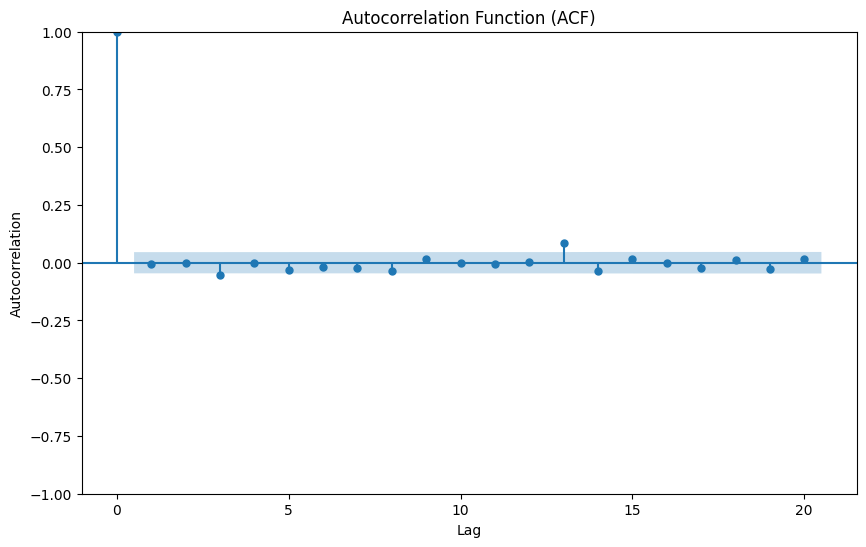

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(ts.Close.diff().dropna(), lags=20, ax=ax)  # Specify the number of lags to display
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

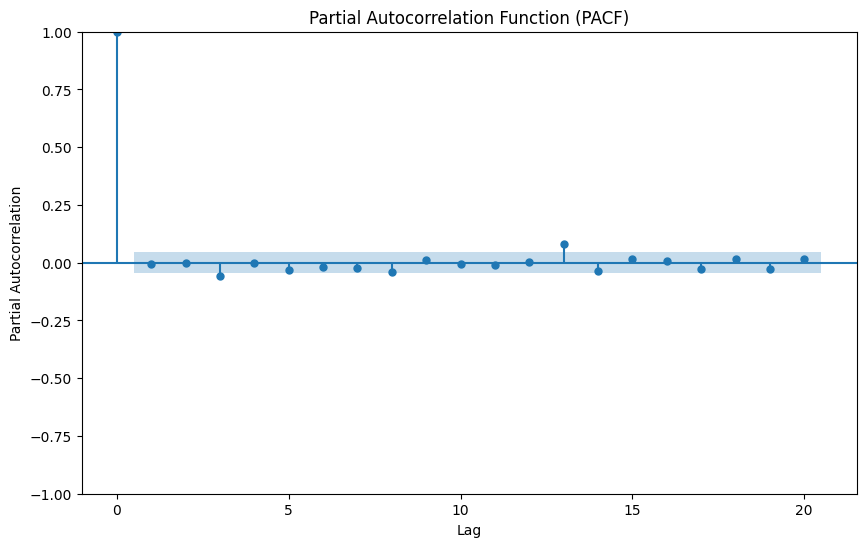

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(ts.Close.diff().dropna(), lags=20, ax=ax)  # Specify the number of lags to display
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [20]:
ts_train = ts.iloc[:int(ts.size * .8)]
ts_test = ts.iloc[int(ts.size * .8):]

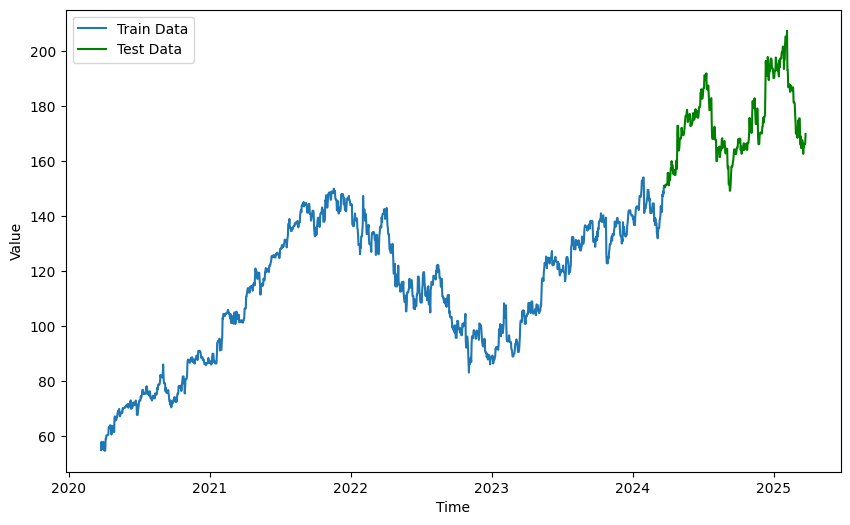

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(ts_train.index, ts_train.values, label='Train Data')
plt.plot(ts_test.index, ts_test.values, 'green', label='Test Data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [22]:
import pmdarima as pm

In [23]:
model = pm.auto_arima(ts_train, seasonal=True)
model.summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1460
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2938.950
Date:                Tue, 25 Mar 2025   AIC                           5879.901
Time:                        13:14:17   BIC                           5885.186
Sample:                    03-25-2020   HQIC                          5881.873
                         - 03-23-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         3.2898      0.060     55.049      0.000       3.173       3.407
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):              2510.59
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               2.12   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(ts_train.values, order=(0, 1, 1))  # Replace p, d, q with appropriate values
model = model.fit()

(array([0.00060235, 0.09798195, 0.0474851 , 0.00040157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00010039]),
 array([-13.36151735,  -6.53890207,   0.28371321,   7.10632849,
         13.92894378,  20.75155906,  27.57417434,  34.39678962,
         41.2194049 ,  48.04202019,  54.86463547]),
 <BarContainer object of 10 artists>)

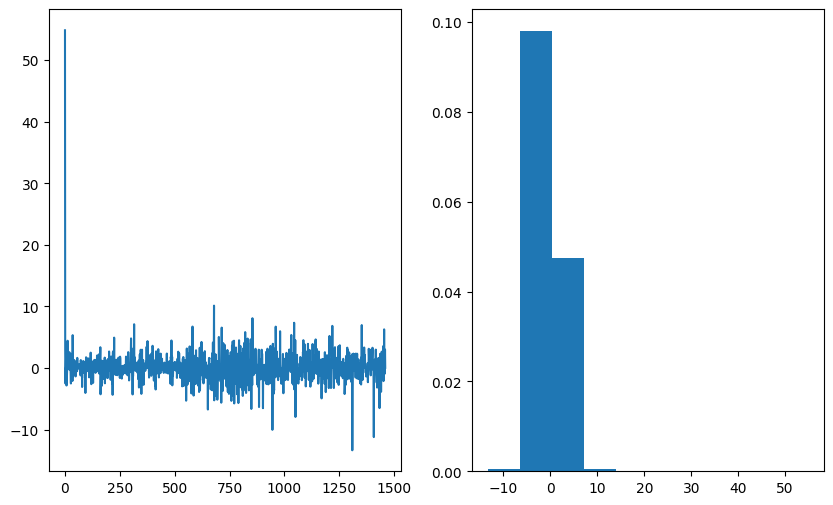

In [25]:
residuals = pd.DataFrame(model.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.plot(residuals)
ax2.hist(residuals, density=True)

In [26]:
forecast_steps = int(ts.size) - int(ts.size * .8)

In [27]:
forecast = model.forecast(steps=forecast_steps)

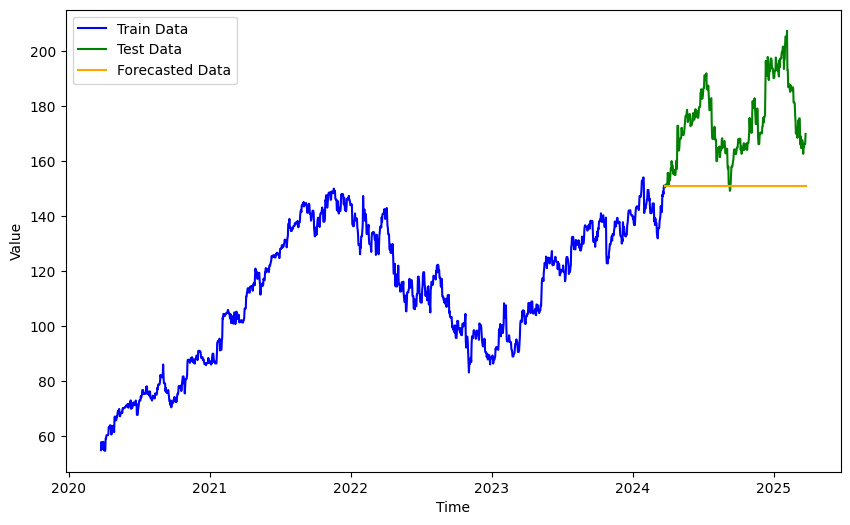

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(ts_train.index, ts_train.values, 'blue', label='Train Data')
plt.plot(ts_test.index, ts_test.values, 'green', label='Test Data')
plt.plot(ts_test.index, forecast, 'orange', label='Forecasted Data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

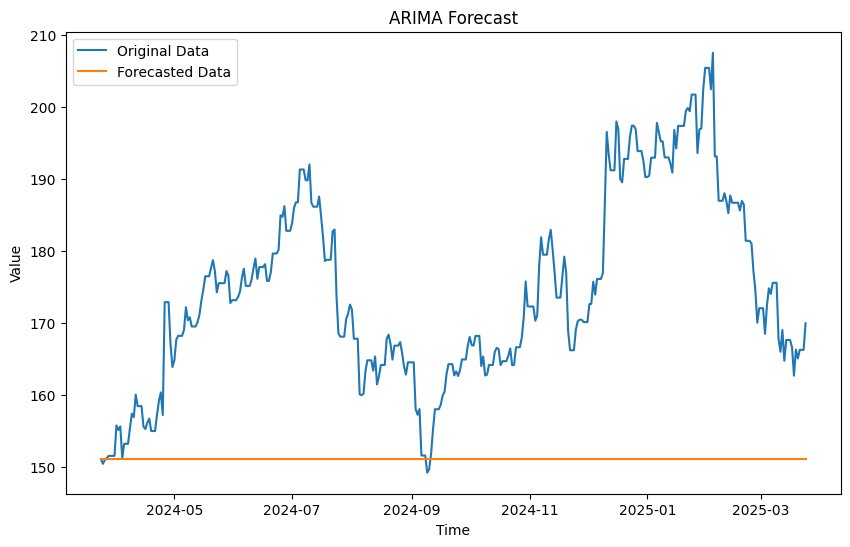

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(ts_test.index, ts_test.values, label='Original Data')
plt.plot(ts_test.index, forecast, label='Forecasted Data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Forecast')
plt.show()